<a href="https://colab.research.google.com/github/Yomex139/Dog-vs-Cat-image-classification-with-Tensorflow/blob/main/Copy_of_Dog_Vs_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# project ------ Dog vs Cat Project

**importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub
import os

# unzipping dataset to Dog vs Cat project folder

In [ ]:
#drive/MyDrive/Dog Vs Cat Project/dogs-vs-cats.zip

In [ ]:
#!unzip 'drive/MyDrive/Dog Vs Cat Project/train.zip' -d 'drive/MyDrive/Dog Vs Cat Project/train.csv'

In [ ]:
#!unzip 'drive/MyDrive/Dog Vs Cat Project/test1.zip' -d 'drive/MyDrive/Dog Vs Cat Project/test.csv'

In [ ]:
filename = ['drive/MyDrive/Dog Vs Cat Project/train.csv/train/'+ fname for fname in os.listdir('drive/MyDrive/Dog Vs Cat Project/train.csv/train') ]

In [ ]:
filename = np.sort(filename)

In [ ]:
from IPython.display import Image

In [ ]:
#making a copy of a list
filename_copy = filename.copy()
filename_copy[:13]

array(['drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.0.jpg',
       'drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.1.jpg',
       'drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.10.jpg',
       'drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.100.jpg',
       'drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.1000.jpg',
       'drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.10000.jpg',
       'drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.10001.jpg',
       'drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.10002.jpg',
       'drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.10003.jpg',
       'drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.10004.jpg',
       'drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.10005.jpg',
       'drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.10006.jpg',
       'drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.10007.jpg'],
      dtype='<U62')

In [ ]:
filename[0]

'drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.0.jpg'

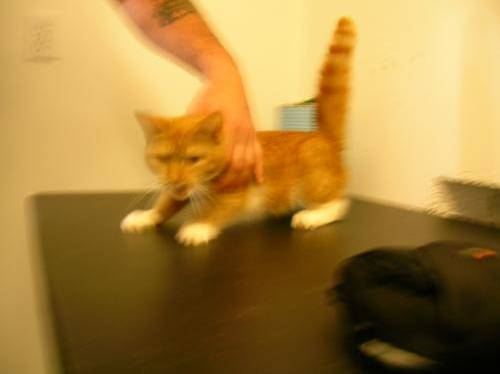

In [ ]:
from IPython.display import Image
Image(filename[0])

In [ ]:
cat = filename_copy[:12500]

In [ ]:
dog = filename_copy[12500:]


In [ ]:
filename_copy[0]

'drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.0.jpg'

In [ ]:
for i in range(len(cat)):
  cat[i] = 'cat'

for i in range(len(dog)):
  dog[i] = 'dog'

In [ ]:
label = [*cat,*dog]
label[14000]

'dog'

In [ ]:
unique_anim = np.unique(label)
unique_anim

array(['cat', 'dog'], dtype='<U3')

In [ ]:
len(label),len(filename),len(unique_anim)

(25000, 25000, 2)

In [ ]:
print(label[16000])
label[16000]==unique_anim

dog


array([False,  True])

In [ ]:
boolean_label = [labels==unique_anim for labels in label]

In [ ]:
boolean_label[0]

array([ True, False])

# plot(view) some of the training images

In [ ]:
filename[0]

'drive/MyDrive/Dog Vs Cat Project/train.csv/train/cat.0.jpg'

In [ ]:
arra = [plt.imread(arra) for arra in filename[:28]]
#arra[:5]

In [ ]:
def plot_18_images(images,label):
  plt.figure(figsize=(20,10))
  for image in range(18):
    plt.subplot(6,3,image+1)
    img = images[image]
    lab = label[image]
    plt.imshow(img)
    plt.title(f'label is:{lab}')
    plt.axis('off')

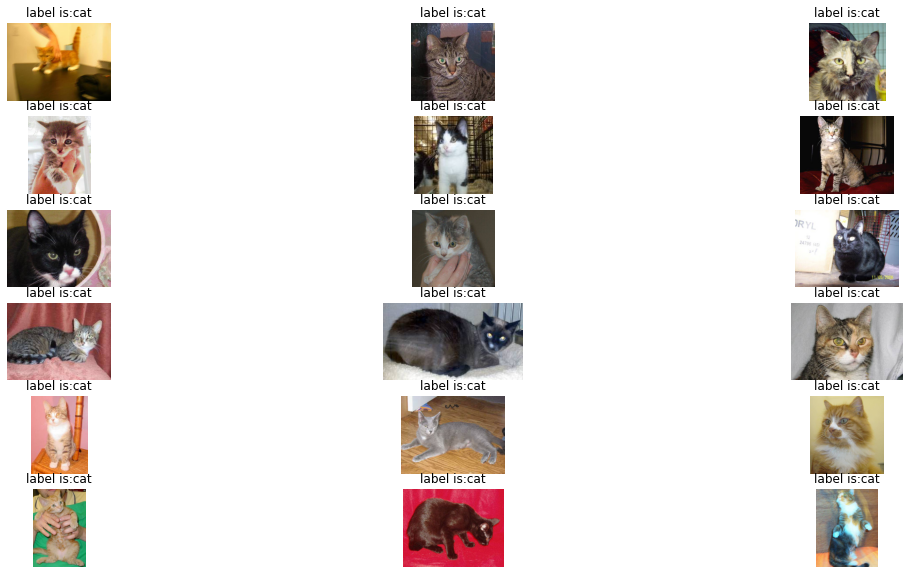

In [ ]:
plot_18_images(arra,label)

dog
(array([1]),)
1
[0 1]


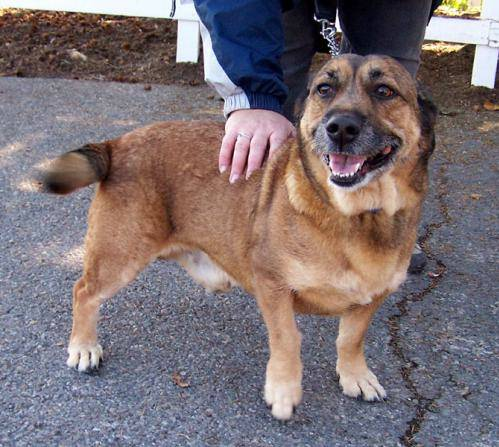

In [ ]:
index = 12543
print(label[index])
print(np.where(unique_anim==label[index]))
print(boolean_label[index].argmax())
print(boolean_label[index].astype(int))
Image(filename[index])

# splitting dataset into valid and training

In [ ]:
NUM_IMAGES = 1000#@param{'type':'slider','min':1000,'max':25000}
#splitting dataset into X and Y
X = filename
Y = boolean_label


#splitting dataset using train_test_split
from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid = train_test_split(X[:NUM_IMAGES],Y[:NUM_IMAGES],test_size=.2,random_state=5)


In [ ]:
len(X_train),len(X_valid),len(Y_train),len(Y_valid)

(800, 200, 800, 200)

# preprocessing our image

In [ ]:
IMAGE_SIZE = [224,224]
def preprocess_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image,channels=3)
  image =tf.image.convert_image_dtype(image,dtype=tf.float32)
  image = tf.image.resize(image,size=IMAGE_SIZE)
  return image

# tupple of image and label

In [ ]:
def get_tupple_image(image_path,label):
  '''
  returns tupple of image,label
  '''
  image = preprocess_image(image_path)
  return image,label


#function to convert boolean label to unique label
def get_truth_label(label):
  '''
  return truth label
  '''
  truth = unique_anim[[label]]
  return truth


#function to the predictions with highest value
def get_pred(prediction):
  '''
  return prediction with highest value
  '''
  predict = unique_anim[prediction.argmax()]
  return predict


# Turn image label into tensors and batches

In [ ]:
BATCH_SIZE = 32
def Tensor_to_batches(X,Y=None,Test_data=False,Valid_data=False,batch_size=BATCH_SIZE):
  if Test_data:
    print('Creating test dataset in batches of 32..................................:)')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data = data.map(preprocess_image)
    data = data.batch(batch_size=BATCH_SIZE)
    return data
  elif Valid_data:
    print('Creating valid dataset in batches of 32.................................:)')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(Y)))
    data = data.map(get_tupple_image)
    data = data.batch(batch_size=BATCH_SIZE)
    return data
  else:
    print('Creating train dataset in batches of 32..................................:)')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(Y)))
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_tupple_image)
    data = data.batch(batch_size=BATCH_SIZE)
    return data


In [ ]:
#train and valid dataset in batches
train_dataset = Tensor_to_batches(X=X_train,
                               Y=Y_train)

valid_dataset = Tensor_to_batches(X=X_valid,
                                  Y=Y_valid,
                                  Valid_data=True)

Creating train dataset in batches of 32..................................:)
Creating valid dataset in batches of 32.................................:)


In [ ]:
train_dataset.element_spec
valid_dataset.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 2), dtype=tf.bool, name=None))

In [ ]:
train_dataset

<BatchDataset shapes: ((None, 224, 224, 3), (None, 2)), types: (tf.float32, tf.bool)>

#plotting 25 images of the batchified dataset

In [ ]:
def plot_25_images(image,label):
  plt.figure(figsize=(20,12))
  for i in range(25):
    plt.subplot(5,5,i+1)
    img = image[i]
    lab = label[i]
    plt.imshow(img)
    plt.title(f'label is:{get_truth_label(lab)}')
    plt.axis('off')


In [ ]:
#train dataset
train_images,train_labels = next(train_dataset.as_numpy_iterator())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


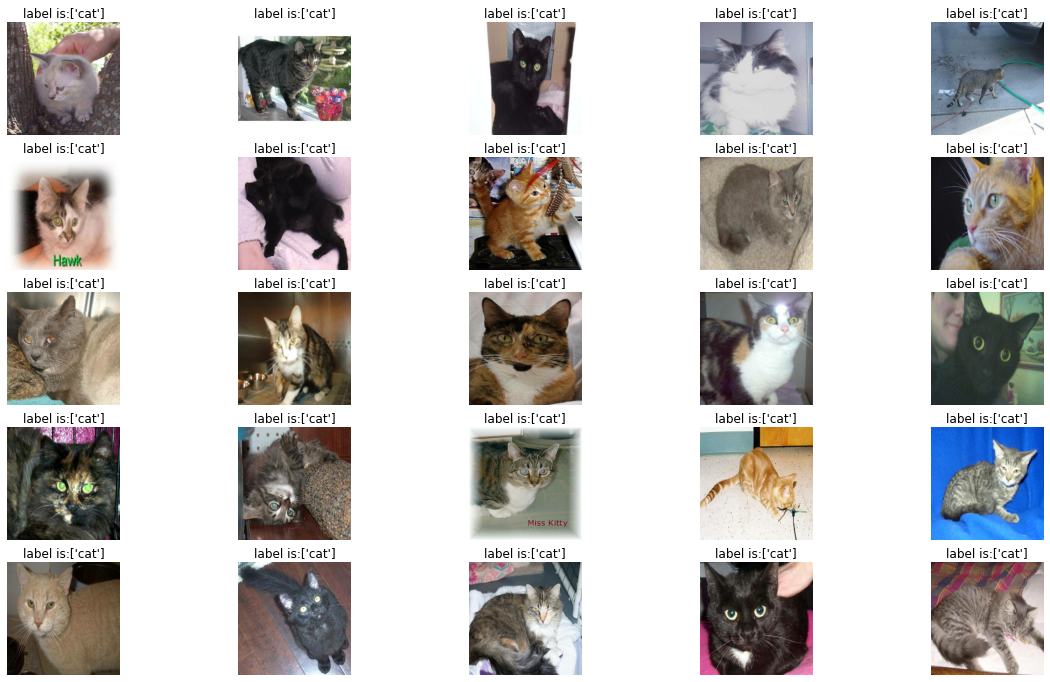

In [ ]:
#train dataset
plot_25_images(image=train_images,
               label=train_labels)

In [ ]:
#valid dataset
val_images,val_labels = next(valid_dataset.as_numpy_iterator())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


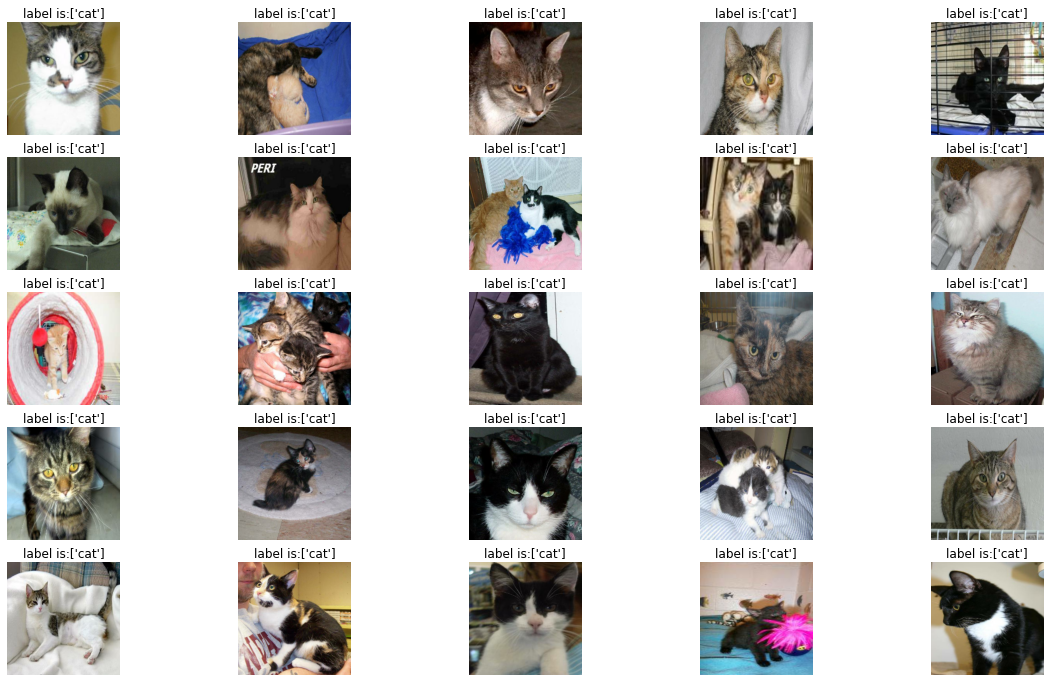

In [ ]:
#plotting valid dataset
plot_25_images(image=val_images,
               label=val_labels)

# function to create model for traning dataset

In [ ]:
INPUT_SHAPE = [None,224,224,3]
OUTPUT_SHAPE = len(unique_anim)
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5'
def Create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model=MODEL_URL):
  print(f'Creating model with:{MODEL_URL}.............:)')
  model = tf.keras.models.Sequential([
                                      hub.KerasLayer(MODEL_URL),#layer 1
                                      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                            activation='sigmoid')#layer 2
                                      ])
  model.compile(
                loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']
                )
  model.build(INPUT_SHAPE)
  return model

In [ ]:
model = Create_model()

Creating model with:https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5.............:)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              6158505   
_________________________________________________________________
dense (Dense)                (None, 2)                 2004      
Total params: 6,160,509
Trainable params: 2,004
Non-trainable params: 6,158,505
_________________________________________________________________


#creating tensor callbacks

In [ ]:
NUM_EPOCHS = 100
import datetime as dt
%load_ext tensorboard
def Create_tensor_callbacks():
  file_path = 'drive/MyDrive/Dog Vs Cat Project/Log_board'
  Log_dir = os.path.join(file_path,
                     dt.datetime.now().strftime('%Y%m%d-%H%M%S')
                     )
  file_dir = tf.keras.callbacks.TensorBoard(Log_dir)
  return file_dir

# functon to fit the model

In [ ]:
early_stopping_0 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)
def fit_model(X=None,Y=None):
  '''
  trained a given model and return the trained version
  '''
  #loading model
  model = Create_model()
  #loading tensorboard callbacks
  tensorboard = Create_tensor_callbacks()
  model.fit(x=X,
            epochs=NUM_EPOCHS,
            validation_data=valid_dataset,
            callbacks=[tensorboard,early_stopping_0])
  return model

In [ ]:
model_1000 = fit_model(train_dataset)

Creating model with:https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5.............:)
Epoch 1/100
25/25 [==============================] - 131s 4s/step - loss: 0.2818 - accuracy: 0.8825 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 2/100
25/25 [==============================] - 3s 112ms/step - loss: 0.0121 - accuracy: 0.9975 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 3/100
25/25 [==============================] - 3s 111ms/step - loss: 0.0073 - accuracy: 0.9987 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 4/100
25/25 [==============================] - 3s 107ms/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.0051 - val_accuracy: 1.0000


In [ ]:
#create function to save model
def save_model(model,SUFFIX=None):
  '''
  saving model to model directory
  '''
  model_path = 'drive/MyDrive/Dog Vs Cat Project/models'
  model_dir = os.path.join(model_path,
                           dt.datetime.now().strftime('%Y%m%d-%H%M%S'))
  print(f'saving model to:{model_dir} ...................:)')
  model.save(model_dir+'_'+SUFFIX+'.h5')
  return model_dir

In [ ]:
#creating function to load_model
def load_model(model_path):
  '''
  function to load already trained saved model from model directory
  '''
  print(f'loading model from:{model_path}..........')
  load = tf.keras.models.load_model(filepath=model_path,
                                    custom_objects={'KerasLayer':hub.KerasLayer}
                                    )
  return load

In [ ]:
#saving model to model path
#save_model(model_1000,SUFFIX='model trained on 1000 images and labels')

In [ ]:
loaded_model = load_model('/content/drive/MyDrive/Dog Vs Cat Project/models/20210607-180352_model trained on 1000 images and labels.h5')

loading model from:/content/drive/MyDrive/Dog Vs Cat Project/models/20210607-180352_model trained on 1000 images and labels.h5..........


In [ ]:
prediction = loaded_model.predict(valid_dataset,
                                  verbose=1)

7/7 [==============================] - 1s 70ms/step


# visualisation

In [ ]:
#visualising validation dataset
def visualize_1(image,truth_label,predictions,n):
  plt.figure(figsize=(5,5))
  img = image[n]
  truth = truth_label[n]
  pred = prediction[n]
  max_pred = pred[pred.argmax()]
  plt.imshow(img)
  plt.title(f'truth:{get_truth_label(truth)}  {max_pred:.0f}%  pred:{get_pred(pred)}',
            color = 'green' if get_truth_label(truth)==get_pred(pred) else 'red')

In [ ]:
images = []
labels = []
#unbatch all the training dataset
def unbatch_data(data):
  dat = data.unbatch()
  for i,v in dat:
    images.append(i)
    labels.append(v)
  return dat

In [ ]:
unbatch_data(train_dataset)

<_UnbatchDataset shapes: ((224, 224, 3), (2,)), types: (tf.float32, tf.bool)>

In [ ]:
len(images),len(labels)

(800, 800)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


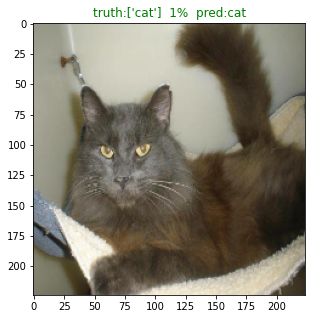

In [ ]:
visualize_1(image=images,
            truth_label=labels,
            predictions=prediction,
            n=70)

In [ ]:
#visualise the representations of prediction and truth label
def visualize_2(truth_label,predictions,n):
  truth = truth_label[n]
  pred = predictions[n]
  plt.bar(len(truth),pred,
          color='green' if get_truth_label(truth)==get_pred(pred) else 'red')
  plt.xticks(np.arange(len(truth)),
             labels=unique_anim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


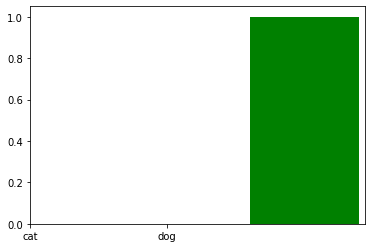

In [ ]:
visualize_2(truth_label=labels,
            predictions=prediction,
            n=70)

# training on full dataset(25000)

In [ ]:
early_stopping_1 = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)
def fit_model_full(X=None,Y=None):
  '''
  trained a given model and return the trained version
  '''
  #turn data to tensors and batches
  full_dataset = Tensor_to_batches(X=X,
                                   Y=Y)
  #loading model
  model = Create_model()
  #loading tensorboard callbacks
  tensorboard = Create_tensor_callbacks()
  model.fit(x=full_dataset,
            epochs=NUM_EPOCHS,
            verbose=1,
            callbacks=[tensorboard,early_stopping_1])
  return model

In [ ]:
#full_model = fit_model_full(X=X,
#                            Y=Y)

In [ ]:
#save_model(full_model,SUFFIX='model trained on full_dataset(25000) images and labels')

# preparing test dataset for prediction

In [ ]:
test_path = ['drive/MyDrive/Dog Vs Cat Project/test.csv/test1/'+fname for fname in os.listdir('drive/MyDrive/Dog Vs Cat Project/test.csv/test1')]

In [ ]:
#preprocessing our test data by turning data into tensor_batches
test_data = Tensor_to_batches(X=test_path,
                              Test_data=True)

Creating test dataset in batches of 32..................................:)


In [ ]:
#load full model
load_25000 = load_model('/content/drive/MyDrive/Dog Vs Cat Project/models/20210609-143013_model trained on full_dataset(25000) images and labels.h5')

loading model from:/content/drive/MyDrive/Dog Vs Cat Project/models/20210609-143013_model trained on full_dataset(25000) images and labels.h5..........


In [ ]:
#making prediction on test dataset
PREDICTIONS = load_25000.predict(test_data,
                                 verbose=1)

391/391 [==============================] - 1722s 4s/step


In [ ]:
#saving predictions in numpy array text format
np.savetxt('drive/MyDrive/Dog Vs Cat Project/Predictions.txt',PREDICTIONS,delimiter=',')

In [ ]:
#loading Prediction
pred_txt = np.loadtxt('drive/MyDrive/Dog Vs Cat Project/Predictions.txt',delimiter=',')

dog


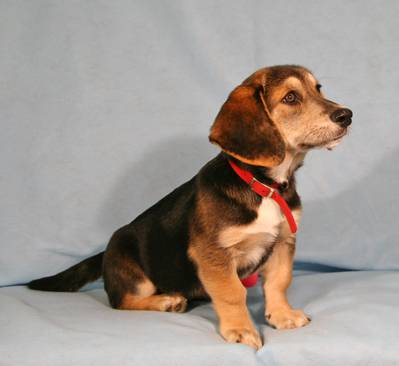

In [ ]:
#checking the perfomance of the model and its predictions
index=1989
print(get_pred(pred_txt[index]))
Image(test_path[index])

In [ ]:
df = pd.read_csv('drive/MyDrive/Dog Vs Cat Project/sampleSubmission.csv')

In [ ]:
df

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
12495,12496,0
12496,12497,0
12497,12498,0
12498,12499,0


In [ ]:
best_pred=[]
for i in pred_txt:
  best_pred.append(i.argmax())


Submission_pred = pd.DataFrame({'id':np.arange(1,12501),
                                'label':best_pred})

In [ ]:
Submission_pred

,id,label
0,1,0
1,2,1
2,3,0
3,4,1
4,5,1
...,...,...
12495,12496,0
12496,12497,1
12497,12498,1
12498,12499,1


In [ ]:
#saving predictions to csv for submission to kaggle
Submission_pred.to_csv('drive/MyDrive/Dog Vs Cat Project/DogvsCat_1',index=False)

In [ ]:
#df1 = pd.read_csv('drive/MyDrive/Dog Vs Cat Project/DogvsCat_1')
#df1